# Chaptre 7 Matplotlibを使ったデータ可視化

# 7-1 データの可視化

## 7-1-1 データの可視化について

## 7-1-2 この章で使用するライブラリのインポート

In [190]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

%precision 3

'%.3f'

# 7-2 データ可視化の基礎

## 7-2-1 棒グラフ

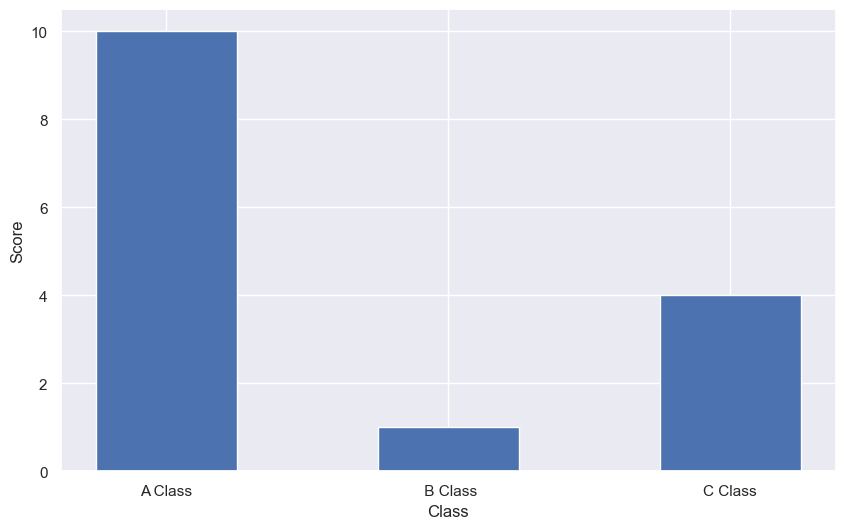

In [191]:
# 表示するデータ
x = [1, 2, 3]
y = [10, 1, 4]

# グラフの大きさ指定
plt.figure(figsize= (10,6))

plt.bar(x, y, align='center', width=0.5)

# 棒グラフそれぞれのラベル
plt.xticks(x, ['A Class', ' B Class', 'C Class'])

# xとyのラベルを設定
plt.xlabel('Class')
plt.ylabel('Score')

plt.grid(True)

### 1-1 横の棒グラフ

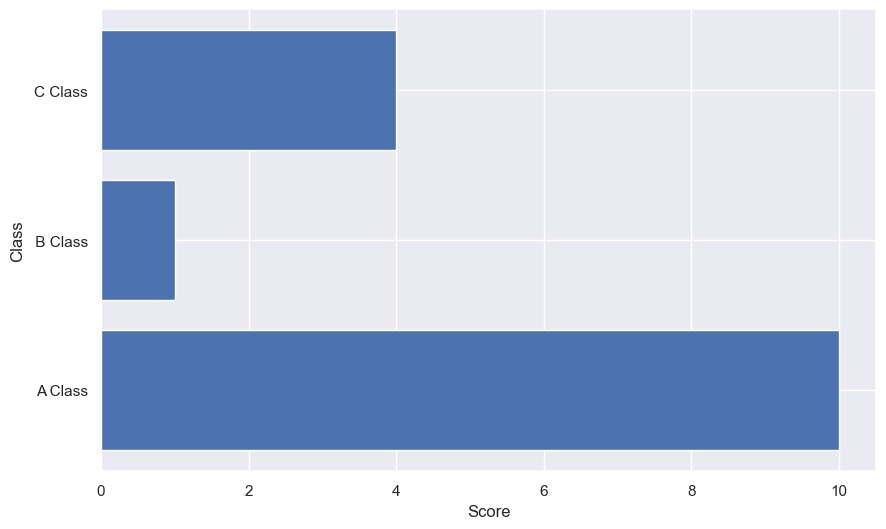

In [192]:
# 表示するデータ
x = [1, 2, 3]
y = [10, 1, 4]

# グラフの大きさ指定
plt.figure(figsize= (10,6))

# barhで横向きに表示
plt.barh(x, y, align='center')

# ラベルのx軸y軸を入れ替えることに注意
plt.yticks(x, ['A Class', ' B Class', 'C Class'])
plt.ylabel('Class')
plt.xlabel('Score')

plt.grid(True)

### 1-2 複数のグラフを描く

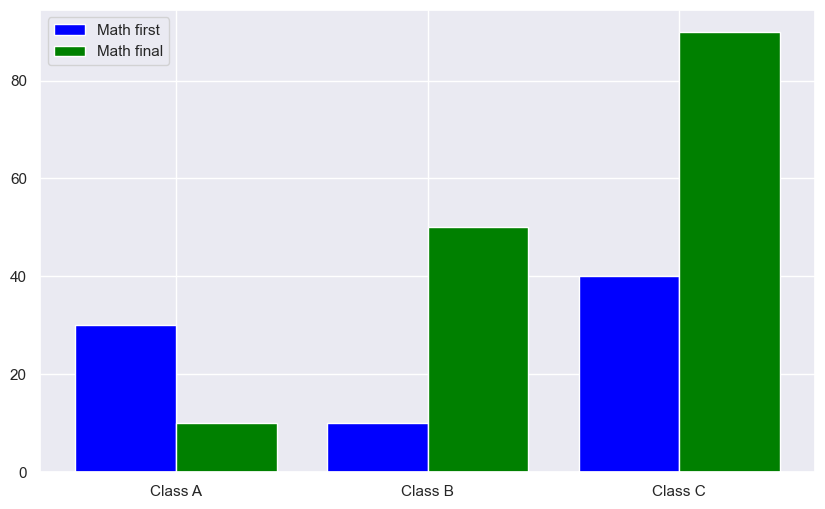

In [193]:
# データの準備
y1 = np.array([30,10,40])
y2 = np.array([10,50,90])

# x軸のデータ
x = np.arange(len(y1))

# グラフの幅
w = 0.4

plt.figure(figsize=(10,6))

# グラフの描画
plt.bar(x, y1, color='blue', width=w, label='Math first', align='center')
plt.bar(x + w, y2, color='green', width=w, label='Math final', align='center')

# 凡例を最適な位置に配置
plt.legend(loc='best')

plt.xticks(x + w / 2, ['Class A', 'Class B', 'Class C'])
plt.grid(True)

In [194]:
### 1-3 積み上げ棒グラフ

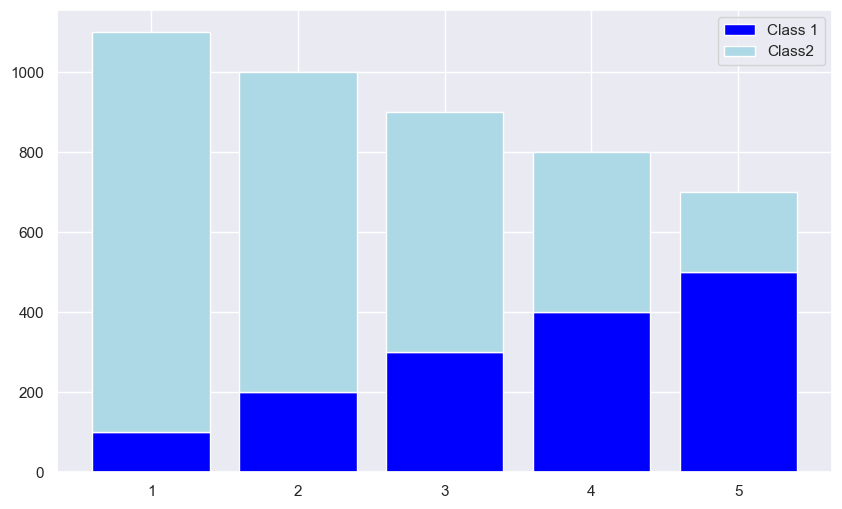

In [195]:
# データの準備
height1 = np.array([100,200,300,400,500])
height2 = np.array([1000,800,600,400,200])

# x軸
x = np.array([1,2,3,4,5])

plt.figure(figsize=(10,6))

# グラフの描画
p1 = plt.bar(x, height1, color='blue')
p2 = plt.bar(x, height2, bottom = height1, color='lightblue')

# 凡例を表示
plt.legend((p1[0], p2[0]), ('Class 1', 'Class2'))

## 7-2-2 円グラフ
### 2-1 一般的な円グラフ

(-1.200, 1.105, -1.100, 1.100)

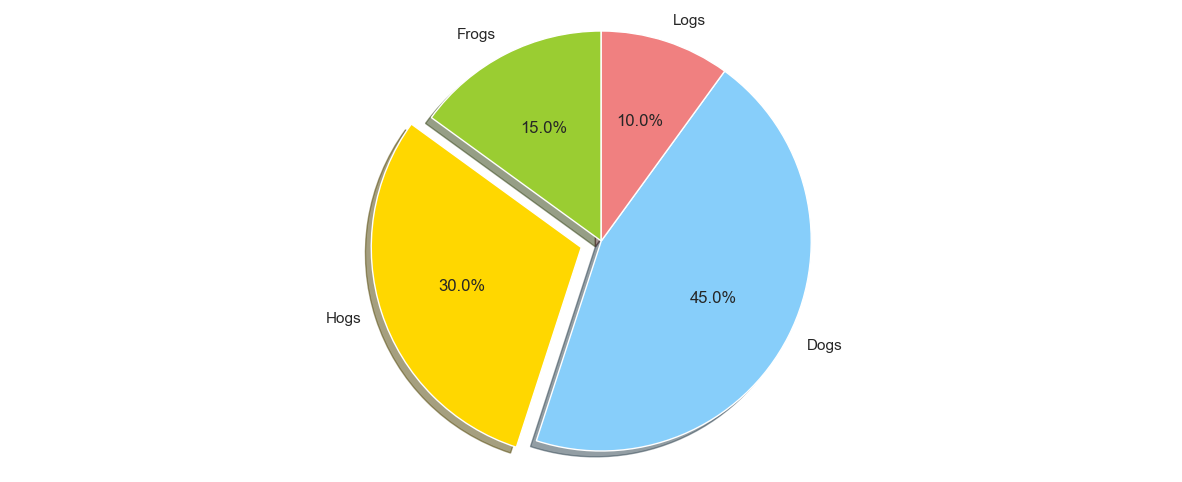

In [196]:
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15,30,45,10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)

plt.figure(figsize=(15,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle= 90)
plt.axis('equal')

### 2-2 バブルチャート

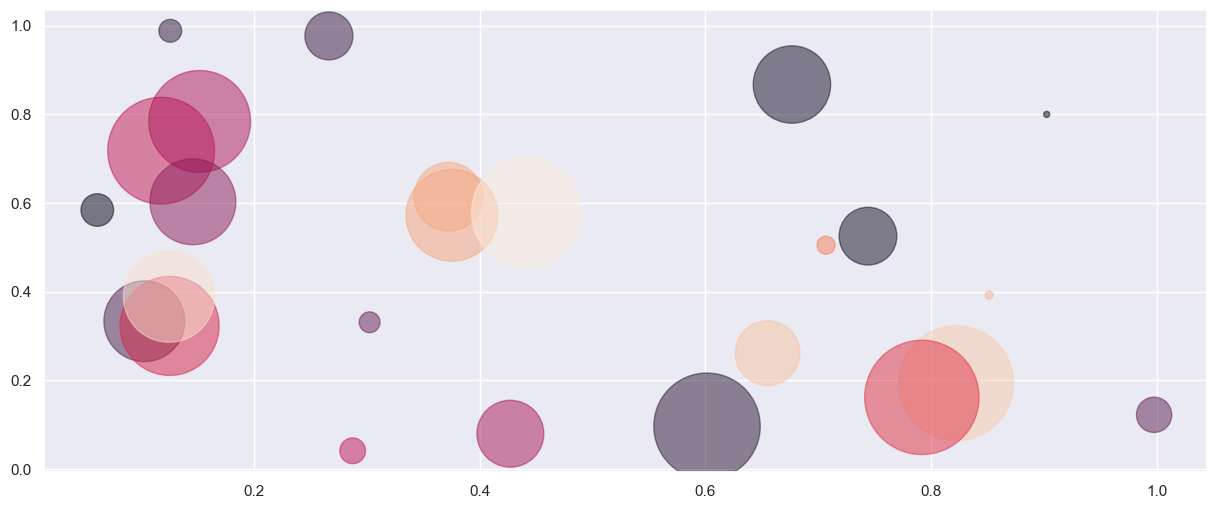

In [197]:
N = 25

# X, Yデータをランダムに生成
x = np.random.rand(N)
y = np.random.rand(N)

# color番号
colors = np.random.rand(N)

# バブルの大きさをばらけさせる
area = 10 * np.pi * (15 * np.random.rand(N)) ** 2

plt.figure(figsize=(15,6))
plt.scatter(x, y, s = area, c = colors ,alpha = 0.5)
plt.grid(True)

### 練習問題 7-1 

In [198]:
# 3章でも使用した数学の点数のデータを使用
import requests, zipfile
from io import StringIO
import io

#データがあるurlの指定
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

#データをurlから取得する
r = requests.get(url, stream=True)

#zipファイルを読み書きする
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

#データをDataframeとして読み込む
student_data_math = pd.read_csv('student-mat.csv')
#区切りに;がついているので要注意
student_data_math = pd.read_csv('student-mat.csv', sep=';')
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [199]:
student_data_math['reason'].unique()

array(['course', 'other', 'home', 'reputation'], dtype=object)

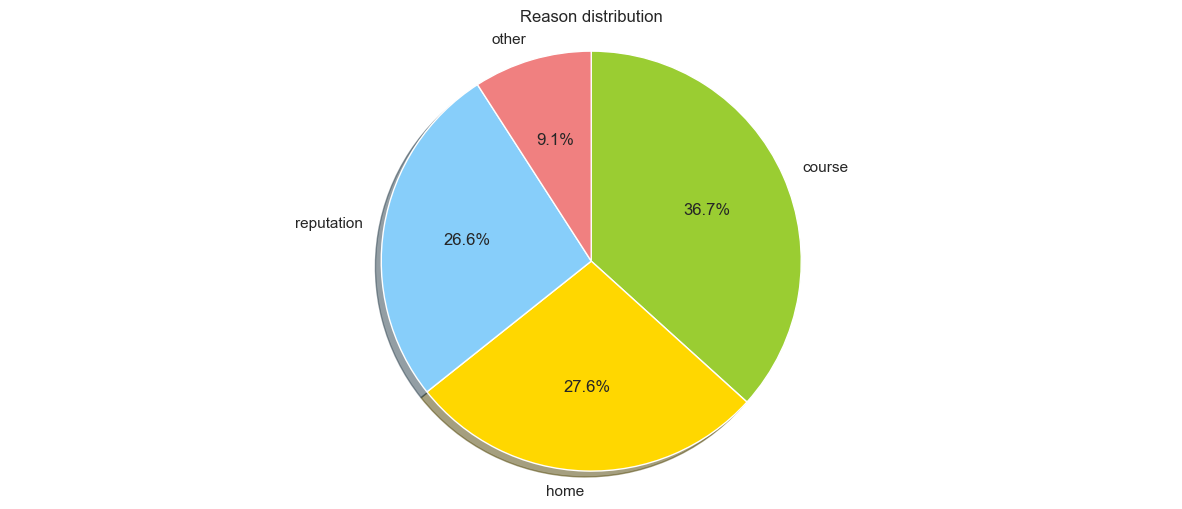

In [200]:
import matplotlib.pyplot as plt

# reason列の値のカウントを取得
sizes = student_data_math['reason'].value_counts()

# ラベルを取得（ユニークな値のリスト）
labels = sizes.index.tolist()

# カウントをリストに変換
sizes = sizes.tolist()

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0, 0)

plt.figure(figsize=(15, 6))
# counterclock=False と設定することで時計回りに表示させる
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90, counterclock=False)
plt.axis('equal')  # 円を真円にする

plt.title('Reason distribution')
plt.show()


### 練習問題 7-2

In [201]:
student_data_math.groupby('higher')['G3'].mean()

higher
no      6.800
yes    10.608
Name: G3, dtype: float64

Text(0, 0.5, 'Score')

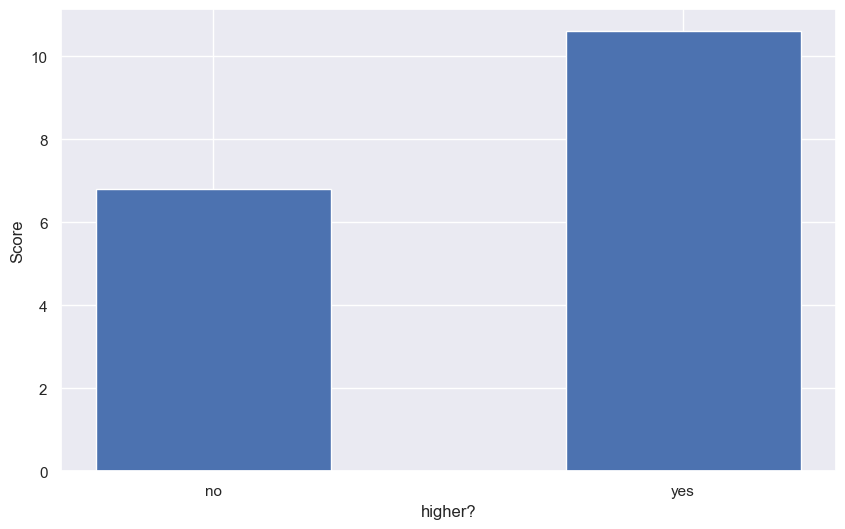

In [202]:
x = [1,2]
y = student_data_math.groupby('higher')['G3'].mean().tolist()
plt.figure(figsize= (10,6))
plt.bar(x, y, align='center', width=0.5)
plt.xticks(x, ['no', 'yes'])
# xとyのラベルを設定
plt.xlabel('higher?')
plt.ylabel('Score')

当然かもだが、高い教育を受けている子の方が点数が高い傾向にある

### 練習問題 7-3

In [203]:
student_data_math.groupby('traveltime')['G3'].mean()

traveltime
1    10.782101
2     9.906542
3     9.260870
4     8.750000
Name: G3, dtype: float64

Text(0.5, 0, 'Score')

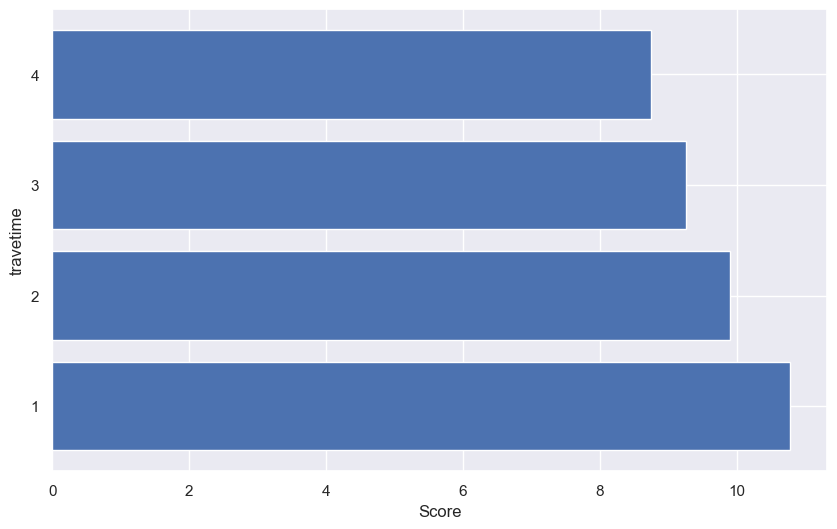

In [204]:
# 表示するデータ
x = [1, 2, 3, 4]
y = student_data_math.groupby('traveltime')['G3'].mean().tolist()

# グラフの大きさ指定
plt.figure(figsize= (10,6))

# barhで横向きに表示
plt.barh(x, y, align='center')

# ラベルのx軸y軸を入れ替えることに注意
plt.yticks(x, ['1', '2', '3', '4'])
plt.ylabel('travetime')
plt.xlabel('Score')

もしかして、距離が長い→勉強時間が確保しずらい→学力低下という可能性が！？

# 7-3 応用：金融データの可視化

## 7-3-1 可視化する金融データ

In [205]:
# 日付データの設定。freq='T'で1分ごとにデータを生成する。
idx = pd.date_range('2015/01/01', '2015/12/31 23:59', freq='T')

# 乱数の発生。-1か1を発生させる。
dn = np.random.randint(2, size=len(idx)) * 2 - 1

# ランダムウォーク（ランダムに数値が増減するデータ）を作成
# np.cumprodは累積和を算出している
rnd_walk = np.cumprod(np.exp(dn * 0.0002)) * 100

# resample('B')でデータを営業日単位でサンプリング
# ohlcメソッドで「open」「high」「low」「close」の4つのデータにする
df = pd.Series(rnd_walk, index=idx).resample('B').ohlc()

/var/folders/5k/0bfc6pzn3z9_z6xn1rvv40sr0000gn/T/ipykernel_92876/3995497716.py:2: FutureWarning:

'T' is deprecated and will be removed in a future version, please use 'min' instead.



<Axes: >

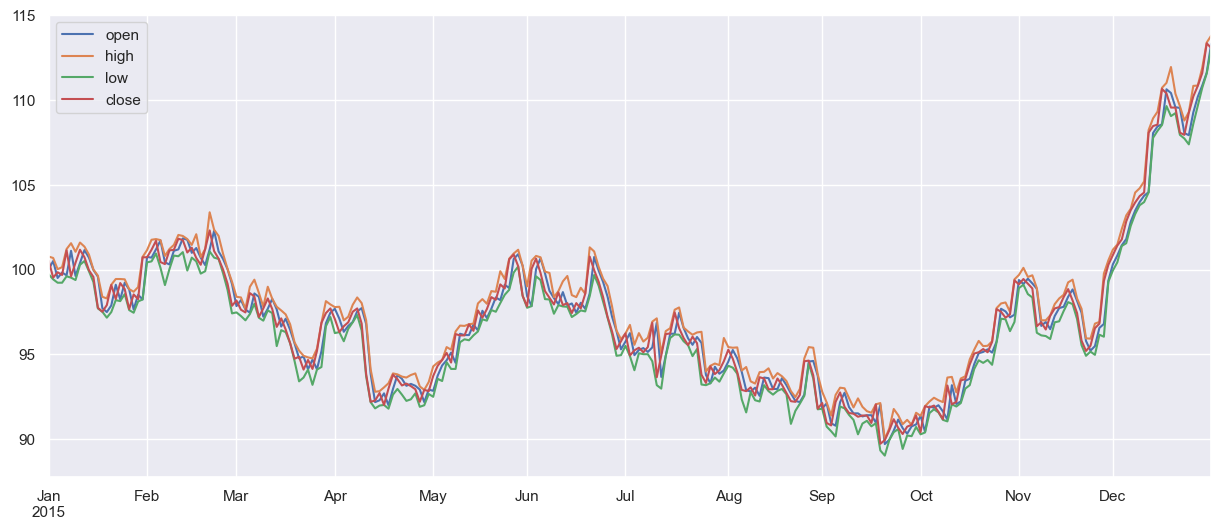

In [206]:
df.plot(figsize=(15,6), legend='best', grid=True)

## 7-3-2 ローソクチャートを表示するライブラリ

In [207]:
# plotlyライブラリのインポート
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as FF  # figure_factoryの正しいインポート

# jupyter notebook 用の設定
init_notebook_mode(connected=True)

# ローソクチャートの設定
fig = FF.create_candlestick(df['open'], df['high'], df['low'], df['close'], dates=df.index)

fig.update_layout(height=800)

# グラフの描画
iplot(fig)

/opt/anaconda3/lib/python3.12/site-packages/plotly/figure_factory/_ohlc.py:29: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/opt/anaconda3/lib/python3.12/site-packages/plotly/figure_factory/_ohlc.py:41: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/opt/anaconda3/lib/python3.12/site-packages/plotly/figure_factory/_candlestick.py:241: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/opt/anaconda3/lib/python3.12/site-packages/plotly/fi

## 7章　総合問題
### 総合問題 7-1 時系列データ分析

#### 1. データの取得と確認

In [208]:
# データのインポート
import requests, zipfile
from io import StringIO
import io

#データがあるurlの指定
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip'

#データをurlから取得する
r = requests.get(url, stream=True)

#zipファイルを読み書きする
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

#データをDataframeとして読み込む
dow_jones_index = pd.read_csv('dow_jones_index.data')
dow_jones_index.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [209]:
# NaNがどのくらいあるか確認
dow_jones_index.isnull().sum()

quarter                                0
stock                                  0
date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
percent_change_next_weeks_price        0
days_to_next_dividend                  0
percent_return_next_dividend           0
dtype: int64

In [210]:
dow_jones_index.describe()

,quarter,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
count,750.000000,7.500000e+02,750.000000,720.000000,7.200000e+02,750.000000,750.000000,750.000000
mean,1.520000,1.175478e+08,0.050262,5.593627,1.173876e+08,0.238468,52.525333,0.691826
std,0.499933,1.584381e+08,2.517809,40.543478,1.592322e+08,2.679538,46.335098,0.305482
min,1.000000,9.718851e+06,-15.422900,-61.433175,9.718851e+06,-15.422900,0.000000,0.065574
25%,1.000000,3.086624e+07,-1.288053,-19.804284,3.067832e+07,-1.222068,24.000000,0.534549
50%,2.000000,5.306088e+07,0.000000,0.512586,5.294556e+07,0.101193,47.000000,0.681067
75%,2.000000,1.327218e+08,1.650888,21.800622,1.333230e+08,1.845562,69.000000,0.854291
max,2.000000,1.453439e+09,9.882230,327.408924,1.453439e+09,9.882230,336.000000,1.564210


In [211]:
dow_jones_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   date                                750 non-null    object 
 3   open                                750 non-null    object 
 4   high                                750 non-null    object 
 5   low                                 750 non-null    object 
 6   close                               750 non-null    object 
 7   volume                              750 non-null    int64  
 8   percent_change_price                750 non-null    float64
 9   percent_change_volume_over_last_wk  720 non-null    float64
 10  previous_weeks_volume               720 non-null    float64
 11  next_weeks_open                     750 non-n

#### 2. データの加工

In [212]:
# datetime型に変更
dow_jones_index['date'] = pd.to_datetime(dow_jones_index['date'], format='%m/%d/%Y')

In [213]:
dow_jones_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   quarter                             750 non-null    int64         
 1   stock                               750 non-null    object        
 2   date                                750 non-null    datetime64[ns]
 3   open                                750 non-null    object        
 4   high                                750 non-null    object        
 5   low                                 750 non-null    object        
 6   close                               750 non-null    object        
 7   volume                              750 non-null    int64         
 8   percent_change_price                750 non-null    float64       
 9   percent_change_volume_over_last_wk  720 non-null    float64       
 10  previous_weeks_volume     

In [214]:
dow_jones_index.head(3)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.42849,26,0.182704
1,1,AA,2011-01-14,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.47066,19,0.187852
2,1,AA,2011-01-21,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.63831,12,0.189994


In [215]:
dow_jones_index['next_weeks_open'] = dow_jones_index['next_weeks_open'].str.replace('$', '').astype(float)
dow_jones_index['next_weeks_close'] = dow_jones_index['next_weeks_close'].str.replace('$', '').astype(float)

In [216]:
dow_jones_index.head(3)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.42849,26,0.182704
1,1,AA,2011-01-14,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.47066,19,0.187852
2,1,AA,2011-01-21,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.63831,12,0.189994


In [217]:
dow_jones_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   quarter                             750 non-null    int64         
 1   stock                               750 non-null    object        
 2   date                                750 non-null    datetime64[ns]
 3   open                                750 non-null    object        
 4   high                                750 non-null    object        
 5   low                                 750 non-null    object        
 6   close                               750 non-null    object        
 7   volume                              750 non-null    int64         
 8   percent_change_price                750 non-null    float64       
 9   percent_change_volume_over_last_wk  720 non-null    float64       
 10  previous_weeks_volume     

#### 3. カラムのcloseについて、各stockごとの要約統計量を算出してください

In [218]:
dow_jones_index.groupby('stock')['close'].describe()

,count,unique,top,freq
stock,,,,
AA,25,25,$16.42,1
AXP,25,24,$46.25,2
BA,25,25,$69.38,1
BAC,25,23,$14.25,2
CAT,25,25,$93.73,1
CSCO,25,25,$20.97,1
CVX,25,25,$91.19,1
DD,25,24,$50.29,2
DIS,25,23,$41.52,3


#### 4. カラムのcloseについて、各stockの相関を算出する相関行列を出してください。seabornのheatmap関数を使用して、相関行列のヒートマップを描いてみましょう（pandasのcorrメソッドを使用します）

In [223]:

# データフレームをピボットして、各株式の 'close' をカラムにする
pivot_df = dow_jones_index.pivot(index='date', columns='stock', values='close')

# 'close' カラムについての相関行列を計算
correlation_matrix = pivot_df.corr()

# 相関行列の表示
print(correlation_matrix)

# 相関行列のヒートマップを描画
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


TypeError: SeriesGroupBy.corr() missing 1 required positional argument: 'other'